# Small examples of bimodule approximation.
This notebook provide a few examples of simple bimodule with explainations. <br>
Note that "in a real usecase", simplextrees are generated by datasets and are much bigger than these ones.

## Setup

If you haven't installed the python library, you can compile it and install if via pip using the following command :


In [1]:
# !pip install --user src/

In [2]:
import matplotlib.pyplot as plt  # plots for python
import gudhi as gd               # Gudhi library
import numpy as np               # to have usable math functions in python 
import random                    # generate elementary random numbeers
from mma import *                # python bindings of module approximation c++ functions.

## Small examples

### Toy example

In [3]:
# Generates a small bimodule from a simplextree (see Gudhi's documentation).
simplextree = gd.SimplexTree()
simplextree.insert([0,1])
simplextree.insert([2])

# Sets filtration values to each node. Format : [Filtration 1, Filtration 2 , ..., Filtration n]. Here n=2.
filters = [[0,1,1,1],[1,0,1,1]]
# this sets the following filtration :  0 -> [0,1], 1 -> [1,0], 2 -> [1,1], [0,1] -> [1,1]

# Defines on which rectangle to plot. Format : [x,y], where x,y defines the rectangle {z : x ≤ z ≤ y}. 
# If not specified, the algorithms will try to find a good plot window.
box = [[0,0],[2,2]]

# Precision controls the bottleneck distance of the approximation. 
#    - A too low value implies a too high computational cost,
#    - A too high value can result in a bad approximation.
precision = 0.9

Now that we have the arguments, we can now compute the 2-persistence module :

In [4]:
# The syntax is the following : 
# approx : simplextree/bounarymatrix, multi-parameter filtration, precision=0.01, box(can be inferred from filtration) -> bimodule structure
mod = approx(simplextree, filters, precision, box)

And plot it's $0$-homology :

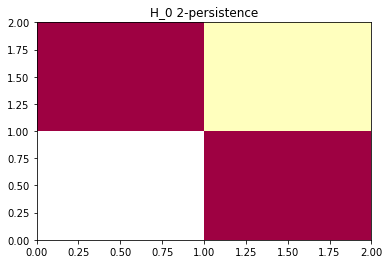

In [5]:
mod.plot(dimension=0)

What happens now if we dont reconnect the interval and remove the point 2 ?


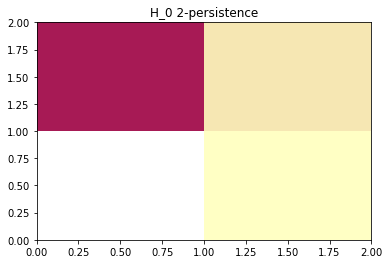

In [6]:
simplextree = gd.SimplexTree()
simplextree.insert([0])
simplextree.insert([1])
filters = [[0,1],[1,0]]
approx(simplextree, filters, box=box).plot(alpha=0.9) # alpha is a transparancy parameter

This yields a module with the same rank invariant as the previous one, but not equal. Our algorithm retreives it easily.

## A non-(interval-decomposable) module.
Even if the module is **not** interval-decomposable, the algorithm will still return a persistence module, but we don't have a theorical result on its closeness (for instance wrt the interleaving distance) to the real module. <br>
We consider the follwing chain complex.

In [7]:
#         1
#       / * \
#      / *** \
#     / ***** \
#   0 -------- 2
#     \       /
#      \     /
#       \   /
#         3   

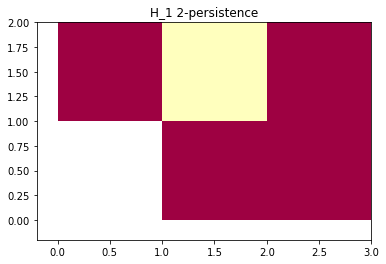

In [8]:
# Generates a complex chain whose 2-persistence is an indecomposable module which is not an indicator module.
simplextree = gd.SimplexTree()

simplextree.insert([0,1,2])
simplextree.insert([0,3])
simplextree.insert([2,3])

#  filtration is ordered by lexicographic order
filtration = np.array([
    #filtration # simplex
    [0, 0],     #0
    [0, 1],     #1
    [0, 0],     #2
    [0, 0],     #3
    [0, 1],     #0 1
    [1, 0],     #0 2
    [0, 0],     #0 3
    [0, 1],     #1 2
    [0, 0],     #2 3
    [2, 1]      #0 1 2
])

# An interval decomposable approximation of an indecomposable module.
# Note that it will be the same approximation for any precision < 1.
box = [[-0.2,-0.2],[3,2]]
approx(simplextree, filtration, precision=0.5, box=box).plot(dimension=1)


## Module approximation versus precision

### Band example

As above, we generate a 2-persistence module, and compute an approximation. The approximation is computed using the information of `plot_vine_2d`.

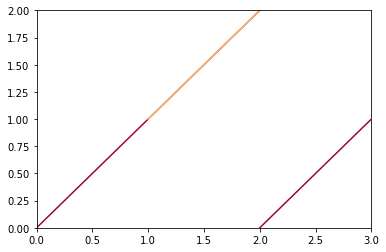

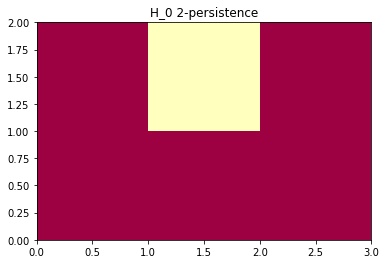

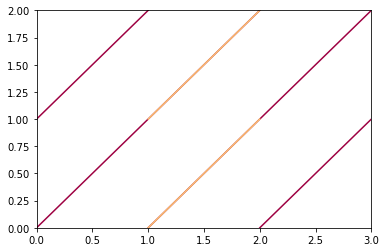

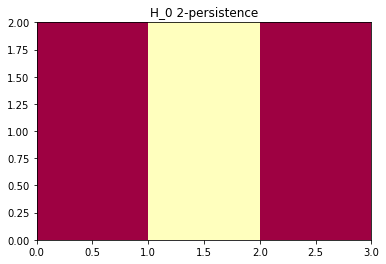

In [9]:
# Generates a 2-persistence module
simplextree = gd.SimplexTree()
simplextree.insert([0,1])
simplextree.insert([1,2])
F1 = np.array([0,2,1])
F2 = np.array([0,0,0])
F  = [F1,F2]
box = [[0,0],[3,2]]
# Computes an approximation for precision = 2 and precision = 1. The approximation is exact here if precision < 
# The plot_vine_2d plots matched barcodes along slope 1 lines.

plot_vine_2d  (simplextree, F, precision = 2, box = box)
approx(simplextree, F, precision=2, box=box).plot()
plot_vine_2d  (simplextree, F, precision = 1, box = box)
approx(simplextree, F, precision=1, box=box).plot()

### Two examples having the same pointwise dimension.

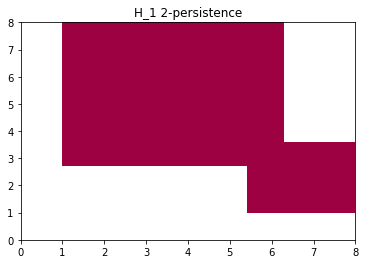

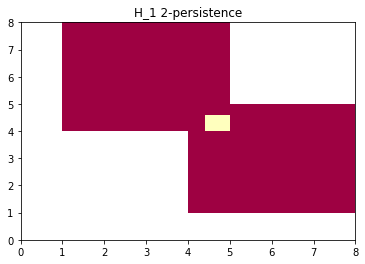

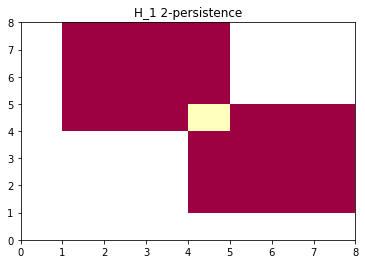

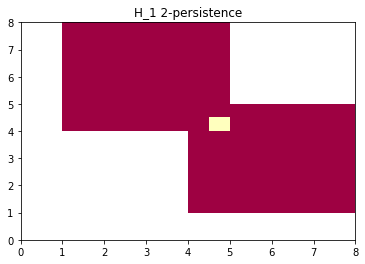

0.07568183487447955


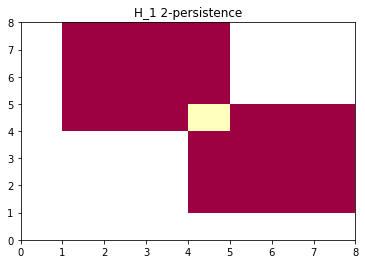

In [10]:
s = gd.SimplexTree()
s.insert([0,1,4])
s.insert([0,3,4])
s.insert([1,3,4])
s.insert([0,2,5])
s.insert([0,3,5])
s.insert([1,2,5])
s.insert([1,3,5])
s.insert([6,7,9])
s.insert([6,8,9])
s.insert([7,8,9])
s.insert([6,7,10])
s.insert([6,8,10])
s.insert([7,8,10])
F1 = np.array([1,1,1,4,5,4,4,4,4,4,5])
F2 = np.array([1,1,4,1,5,4,4,4,4,5,4])
filters = np.hstack([F1[:,np.newaxis], F2[:,np.newaxis]])
box = [[0,0], [8,8]]

# no line crosses the small yellow module here, so none is plotted. 
# The approximation algorithm knows that this summand exists, but it doesn't know where to put it.
approx(s, filters, precision=3.1, box=box).plot(dimension=1)

# In that case the big red module is recovered, but not the yellow module
approx(s, filters, precision=2.1, box=box).plot(dimension=1)

# Here we only need a precision of 2 to recover the entire module !
approx(s, filters, precision=2, box=box).plot(dimension=1)

# It's not because a bigger precision can recover the module that a smaller one can.
# But there are theorical guarantees :
#     - the bottleneck (and thus interleaving) distance is controlled by the precision.
#     - we know that the red interval summand is exactly recovered for a precision < 2
#             and the yellow interval summand is exactly recovered for a precision < 1.
#     See the original paper for details.
approx(s, filters, precision=1.7, box=box).plot(dimension=1)

# you can check that the yellow interval summand is always recovered if 0 ≤ precision ≤ 1.
precision = max(random.random(),0.001)
print(precision)
approx(s, filters, precision=precision, box=box).plot(dimension=1)


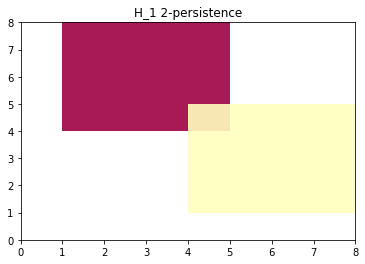

In [11]:
s = gd.SimplexTree()
#cycle 1
s.insert([0,1,3])
s.insert([0,2,3])
s.insert([1,2,3])
#cycle 2
s.insert([4,5,7])
s.insert([5,6,7])
s.insert([4,6,7])
filters = [[1,1,1,5,4,4,4,4], [4,4,4,4,1,1,1,5]]
box = [[0,0],[8,8]]

approx(s, filters, precision=1, box=box).plot(dimension=1, alpha=0.9)